# Retail Strategy and Analytics - Task 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr


In [2]:
#Import data

df_1 = pd.read_csv('QVI_transaction_data.csv')
df_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
df_2 = pd.read_csv('QVI_purchase_behaviour.csv')
df_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [112]:
#Combining_Tables

df_purchase = pd.merge(df_1, df_2, on='LYLTY_CARD_NBR', how='inner')
df_purchase.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,11/10/2018,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,3/9/2019,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
5,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
7,5/19/2019,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
8,8/6/2018,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget
9,8/9/2018,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget


In [5]:
#Checking_missing_Values

df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  object 
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 22.2+ MB


In [6]:
#Create a copy of DataFrame

df_purchase_1 = df_purchase.copy()
df_purchase_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,11/10/2018,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,3/9/2019,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [7]:
#Check_data_type

type(df_purchase_1.DATE.loc[0])

str

In [8]:
#Change_DATE_data_type

df_purchase_1['DATE'] = pd.to_datetime(df_purchase_1['DATE'], format = '%m/%d/%Y')
df_purchase_1['DATE']

0        2018-10-17
1        2019-05-14
2        2018-11-10
3        2019-03-09
4        2019-05-20
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

Check_data_type_of_every_column

In [9]:
type(df_purchase_1.DATE.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#Create a new column with month

df_purchase_1['YEAR_MONTH'] = df_purchase_1['DATE'].dt.to_period('M')
df_purchase_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05


In [11]:
#Define the measure calculations for all Stores

df_grouped = df_purchase_1.groupby(['YEAR_MONTH', 'STORE_NBR'])

summary = df_grouped.agg(
    TOTAL_SALES=('TOT_SALES', 'sum'),
    NUM_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'),
    NUM_TRANSACTIONS=('LYLTY_CARD_NBR', 'count'),
    TOTAL_CHIPS=('PROD_QTY', 'sum')
).reset_index()

# Calculate transactions per customer
summary['TRANSACTIONS_PER_CUSTOMER'] = round(summary['NUM_TRANSACTIONS'] / summary['NUM_CUSTOMERS'],2)

In [12]:
type(summary.YEAR_MONTH.loc[0])

pandas._libs.tslibs.period.Period

In [13]:
# Calculate average price per unit
# Merge the summary with the original filtered DataFrame to get the details required for average price calculation

details = df_purchase_1.groupby(['YEAR_MONTH', 'STORE_NBR', 'LYLTY_CARD_NBR']).agg(
    TOTAL_SALES=('TOT_SALES', 'sum'),
    TOTAL_UNITS=('PROD_QTY', 'sum')
).reset_index()

# Calculate average price per unit at customer level
details['AVG_PRICE_PER_UNIT'] = round(details['TOTAL_SALES'] / details['TOTAL_UNITS'],2)

# Merge the details with the summary to get average price per unit at store and month level
avg_price = details.groupby(['YEAR_MONTH', 'STORE_NBR']).agg(
    AVG_PRICE_PER_UNIT=('AVG_PRICE_PER_UNIT', 'mean')
).reset_index()

# Merge the avg_price with the summary
final_summary = pd.merge(summary, avg_price, on=['YEAR_MONTH', 'STORE_NBR'], how='left')
final_summary['AVG_PRICE_PER_UNIT'] = final_summary['AVG_PRICE_PER_UNIT'].round(2)
final_summary

,YEAR_MONTH,STORE_NBR,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS,TOTAL_CHIPS,TRANSACTIONS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,2018-07,1,206.9,49,52,62,1.06,3.35
1,2018-07,2,150.8,39,41,46,1.05,3.24
2,2018-07,3,1205.7,112,138,271,1.23,4.47
3,2018-07,4,1399.9,128,160,318,1.25,4.42
4,2018-07,5,812.0,93,120,240,1.29,3.40
...,...,...,...,...,...,...,...,...
3164,2019-06,268,224.7,38,40,57,1.05,3.91
3165,2019-06,269,864.4,99,127,254,1.28,3.39
3166,2019-06,270,912.2,104,127,254,1.22,3.68
3167,2019-06,271,928.2,108,129,258,1.19,3.60


In [15]:
final_summary.to_csv('final_summary.csv', index = False)

In [16]:
#Filter data till 2019-02 over all of stores

df_pre_trial = final_summary[(final_summary['YEAR_MONTH'] <= '2019-01')]
df_pre_trial

,YEAR_MONTH,STORE_NBR,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS,TOTAL_CHIPS,TRANSACTIONS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,2018-07,1,206.9,49,52,62,1.06,3.35
1,2018-07,2,150.8,39,41,46,1.05,3.24
2,2018-07,3,1205.7,112,138,271,1.23,4.47
3,2018-07,4,1399.9,128,160,318,1.25,4.42
4,2018-07,5,812.0,93,120,240,1.29,3.40
...,...,...,...,...,...,...,...,...
1843,2019-01,268,157.7,37,38,47,1.03,3.48
1844,2019-01,269,980.4,110,144,288,1.31,3.45
1845,2019-01,270,1066.6,117,155,310,1.32,3.41
1846,2019-01,271,842.4,92,120,240,1.30,3.56


In [17]:
#Filter a trial period 

df_trial = final_summary[(final_summary['YEAR_MONTH'] >= '2019-02') & (final_summary['YEAR_MONTH'] <= '2019-04')]
df_trial

,YEAR_MONTH,STORE_NBR,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS,TOTAL_CHIPS,TRANSACTIONS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
1848,2019-02,1,225.4,52,55,65,1.06,3.49
1849,2019-02,2,139.4,29,32,37,1.10,3.77
1850,2019-02,3,1197.7,116,139,272,1.20,4.43
1851,2019-02,4,883.4,91,102,204,1.12,4.32
1852,2019-02,5,727.0,87,106,212,1.22,3.47
...,...,...,...,...,...,...,...,...
2637,2019-04,268,191.5,47,50,57,1.06,3.44
2638,2019-04,269,991.2,109,139,278,1.28,3.58
2639,2019-04,270,926.4,100,132,264,1.32,3.45
2640,2019-04,271,774.6,87,109,218,1.25,3.55


In [18]:
df_pre_trial.dtypes

YEAR_MONTH                   period[M]
STORE_NBR                        int64
TOTAL_SALES                    float64
NUM_CUSTOMERS                    int64
NUM_TRANSACTIONS                 int64
TOTAL_CHIPS                      int64
TRANSACTIONS_PER_CUSTOMER      float64
AVG_PRICE_PER_UNIT             float64
dtype: object

We need to find a potential control store for each trial store. So we'll calculate how correlated the performance of each store is to the trial store. Also we'll define a standardised metric based on the absolute difference be- tween the trial store’s performance and each control store’s performance.

In [19]:
from scipy.spatial.distance import euclidean  
from scipy.stats import pearsonr

Lets start from trial store 77. We’ll select control stores based on how similar monthly total sales and monthly number of customers are to the trial stores.

In [20]:
def find_control_store(trial_store_id, data, method='euclidean'):
    
    # Define metrics to compare
    metrics = ['TOTAL_SALES', 'NUM_CUSTOMERS', 'TRANSACTIONS_PER_CUSTOMER']
    
    # Extract data for the trial store
    trial_store_data = data[data['STORE_NBR'] == trial_store_id][metrics].values.flatten()  
    
    # Initialize variables to track the best match
    best_match_id = None
    best_match_score = float('inf') if method == 'euclidean' else -float('inf')
    
    # Iterate over each store to calculate similarity
    for store_id in data['STORE_NBR'].unique():
        if store_id == trial_store_id:
            continue
            
        # Extract data for the current store
        store_data = data[data['STORE_NBR'] == store_id][metrics].values.flatten() 
        
        # Ensure the lengths of trial_store_data and store_data are equal
        min_length = min(len(trial_store_data), len(store_data))
        trial_store_data = trial_store_data[:min_length]
        store_data = store_data[:min_length]
        
        # Calculate similarity based on the chosen method
        if method == 'euclidean':
            score = euclidean(trial_store_data, store_data)
            if score < best_match_score:
                best_match_score = score
                best_match_id = store_id
        elif method == 'pearson':
            score, _ = pearsonr(trial_store_data, store_data)
            if score > best_match_score:
                best_match_score = score
                best_match_id = store_id
    
    return best_match_id

trial_store_id = 77
data = pd.DataFrame(final_summary) 
control_store_id = find_control_store(trial_store_id, data)
print("Control store ID:", control_store_id)

Control store ID: 233


The control store for trial store 77 is 233.

Check visually if the drivers are indeed similar in the period before the trial.

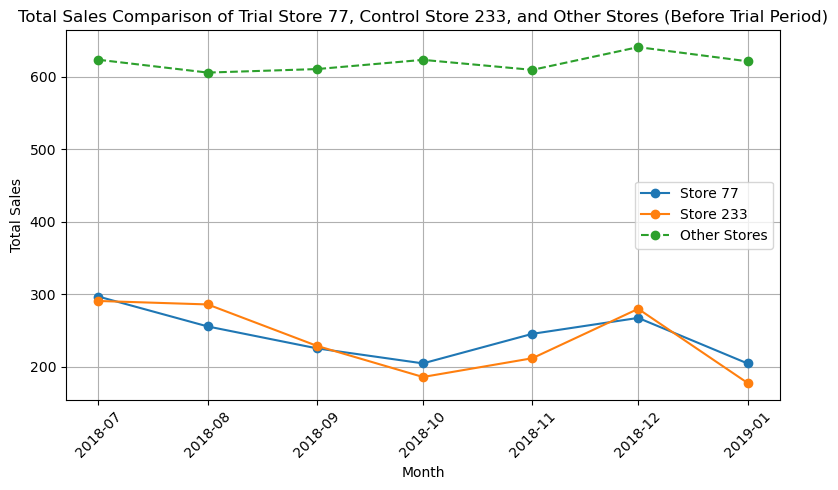

In [21]:
#Total Sales Visualisation

aggregated_data_1 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_1['YEAR_MONTH'] = aggregated_data_1['YEAR_MONTH'].dt.to_timestamp()

# Calculate the average total sales for stores other than 77 and 233
other_stores_data = aggregated_data_1[~aggregated_data_1['STORE_NBR'].isin([77, 233])]
average_other_sales = other_stores_data.groupby('YEAR_MONTH')['TOTAL_SALES'].mean().reset_index()
average_other_sales['STORE_NBR'] = 'Average Other Stores'

# Append the average total sales to the aggregated data
aggregated_data_1 = pd.concat([aggregated_data_1, average_other_sales], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_1.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')

# Plotting the sales data
plt.figure(figsize=(8, 5))

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[77], marker='o', label='Store 77')
plt.plot(pivot_data.index, pivot_data[233], marker='o', label='Store 233')

# Plot the average total sales for other stores
plt.plot(pivot_data.index, pivot_data['Average Other Stores'], marker='o', linestyle='--', label='Other Stores')

# Adding titles and labels
plt.title('Total Sales Comparison of Trial Store 77, Control Store 233, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This plot shows that Total sales in stores are similar and often mirroring each other in the fluctuations.

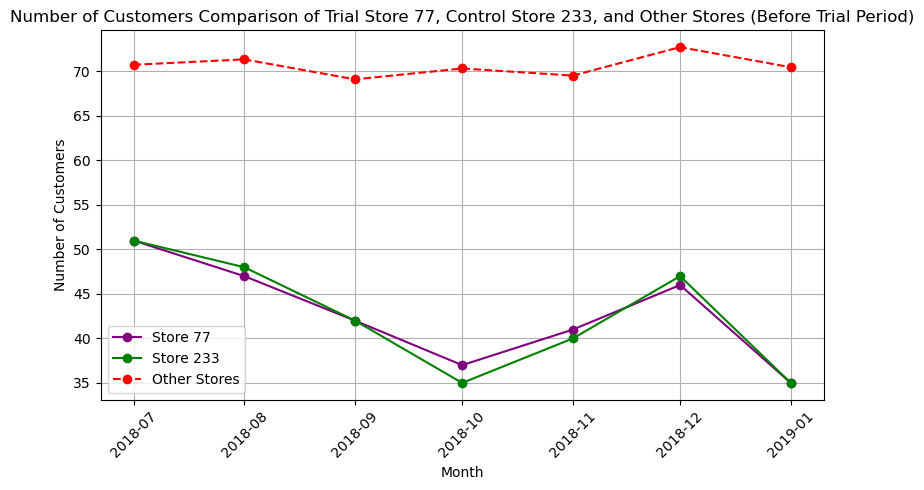

In [22]:
#Number of Customers Visualition

aggregated_data_2 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_2['YEAR_MONTH'] = aggregated_data_2['YEAR_MONTH'].dt.to_timestamp()

# Calculate the average number of customers for stores other than 77 and 233
other_stores_data = aggregated_data_2[~aggregated_data_2['STORE_NBR'].isin([77, 233])]
average_other_customers = other_stores_data.groupby('YEAR_MONTH')['NUM_CUSTOMERS'].mean().reset_index()
average_other_customers['STORE_NBR'] = 'Average Other Customers'

# Append the average data to the aggregated data
aggregated_data_2 = pd.concat([aggregated_data_2, average_other_customers], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_2.pivot_table(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS', aggfunc='sum')


plt.figure(figsize=(8, 5))

plt.plot(pivot_data.index, pivot_data[77], marker='o', label='Store 77', color = 'purple')
plt.plot(pivot_data.index, pivot_data[233], marker='o', label='Store 233', color = 'green')

plt.plot(pivot_data.index, pivot_data['Average Other Customers'], marker='o', linestyle='--', label='Other Stores', color = 'red')

plt.title('Number of Customers Comparison of Trial Store 77, Control Store 233, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The similar patterns observed in Store 77 and Store 233 can be used to predict and understand customer behavior under similar market conditions.

In [23]:
import numpy as np
from scipy.stats import ttest_ind, t

Assessment of trial (Trial period lasted from the 1st of February till the end of April 2019). 
Lets see if there has been an uplift in overall chip sales.

In [24]:
#We start with scaling of control store's Total sales to consider any differences between stores in pre-trial period.

# Filter pre-trial data for trial store 77 and control store 233
trial_store_sales = df_pre_trial[df_pre_trial['STORE_NBR'] == 77]['TOTAL_SALES'].sum()
control_store_sales = df_pre_trial[df_pre_trial['STORE_NBR'] == 233]['TOTAL_SALES'].sum()

# Calculate scaling factor
scaling_factor = trial_store_sales / control_store_sales
scaling_factor

1.023617303289553

In [25]:
import warnings       #to ignore some warning messages
warnings.filterwarnings("ignore")

In [26]:
#Check if the difference is significant
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_77 = df_pre_trial[df_pre_trial['STORE_NBR'] == 77]
pre_trial_df_233 = df_pre_trial[df_pre_trial['STORE_NBR'] == 233]

# Scale the control store pre trial sales
pre_trial_df_233['SCALED_TOTAL_SALES'] = pre_trial_df_233['TOTAL_SALES'] * scaling_factor

# Merge the pre-trial data
pre_trial_merged_1 = pd.merge(
    pre_trial_df_77[['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'}),
    pre_trial_df_233[['YEAR_MONTH', 'SCALED_TOTAL_SALES']].rename(columns={'SCALED_TOTAL_SALES': 'CONTROL_SALES'}),
    on='YEAR_MONTH'
)
pre_trial_merged_1

,YEAR_MONTH,TRIAL_STORE_SALES,CONTROL_SALES
0,2018-07,296.8,297.565550
1,2018-08,255.5,292.652187
2,2018-09,225.2,233.998916
3,2018-10,204.5,190.085733
4,2018-11,245.3,216.597421
5,2018-12,267.3,286.408121
6,2019-01,204.4,181.692071


In [27]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_1['PERCENTAGE_DIFF'] = (pre_trial_merged_1['TRIAL_STORE_SALES'] - pre_trial_merged_1['CONTROL_SALES']) / pre_trial_merged_1['CONTROL_SALES'] * 100

pre_trial_mean = pre_trial_merged_1['PERCENTAGE_DIFF'].mean()
pre_trial_std = pre_trial_merged_1['PERCENTAGE_DIFF'].std()
pre_trial_n = len(pre_trial_merged_1)

print("Pre-trial period mean percentage difference:", pre_trial_mean)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std)

Pre-trial period mean percentage difference: 1.4212137375519325
Pre-trial period standard deviation of percentage differences: 9.95864688407839


In [28]:
# Extract trial store sales and scaled control store sales for the trial period

trial_store_sales_1 = df_trial[df_trial['STORE_NBR'] == 77][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'})
trial_control_sales_1 = df_trial[df_trial['STORE_NBR'] == 233][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'CONTROL_SALES'})
trial_control_sales_1['CONTROL_SALES'] = trial_control_sales_1['CONTROL_SALES'] * scaling_factor

# Merge the trial data
trial_merged_1 = pd.merge(
    trial_store_sales_1,
    trial_control_sales_1,
    on='YEAR_MONTH'
)

In [29]:
# Calculate the percentage difference for the trial period

trial_merged_1['PERCENTAGE_DIFF'] = (trial_merged_1['TRIAL_STORE_SALES'] - trial_merged_1['CONTROL_SALES']) / trial_merged_1['CONTROL_SALES'] * 100
print("Trial period percentage differences:\n", trial_merged_1[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02        -5.910661
1    2019-03        36.652103
2    2019-04        62.307960


In [30]:
# Calculate the t-values for the trial period

trial_merged_1['T_VALUE'] = (trial_merged_1['PERCENTAGE_DIFF'] - pre_trial_mean) / (pre_trial_std / np.sqrt(pre_trial_n))

print("Trial period percentage differences and t-values:\n", trial_merged_1[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF    T_VALUE
0    2019-02        -5.910661  -1.947887
1    2019-03        36.652103   9.359923
2    2019-04        62.307960  16.176012


The trial period resulted in considerable improvements in the trial store’s sales compared to the control store, especially in March and April 2019. The positive percentage differences and high t-values indicate that the changes or interventions made during the trial were effective in boosting sales.


In [31]:
# Calculate degrees of freedom
degrees_of_freedom_1 = pre_trial_n - 1

# Find the 95th percentile of the t distribution
t_critical_value_1 = t.ppf(0.95, degrees_of_freedom_1)

print("95th percentile of the t distribution with", degrees_of_freedom_1, "degrees of freedom:", t_critical_value_1)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [32]:
control_store_sales_1 = final_summary[final_summary['STORE_NBR'] == 233]

In [33]:
# Group by month and calculate the 95th percentile for each month
percentile_95_total_sales_1 = np.percentile(control_store_sales_1['TOTAL_SALES'], 95)

# Print the result
print("95th Percentile of Total Sales for Control Store 233:", percentile_95_total_sales_1)

95th Percentile of Total Sales for Control Store 233: 314.86499999999995


In [34]:
percentile_5_total_sales_1 = np.percentile(control_store_sales_1['TOTAL_SALES'], 5)

# Print the result
print("5th Percentile of Total Sales for Control Store 233:", percentile_5_total_sales_1)

5th Percentile of Total Sales for Control Store 233: 168.995


In [35]:

monthly_sales_1 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()

In [36]:
# Convert period data to timestamps
monthly_sales_1['YEAR_MONTH'] = monthly_sales_1['YEAR_MONTH'].dt.to_timestamp()

In [37]:
# Pivot the data for visualization
pivot_data = monthly_sales_1.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')


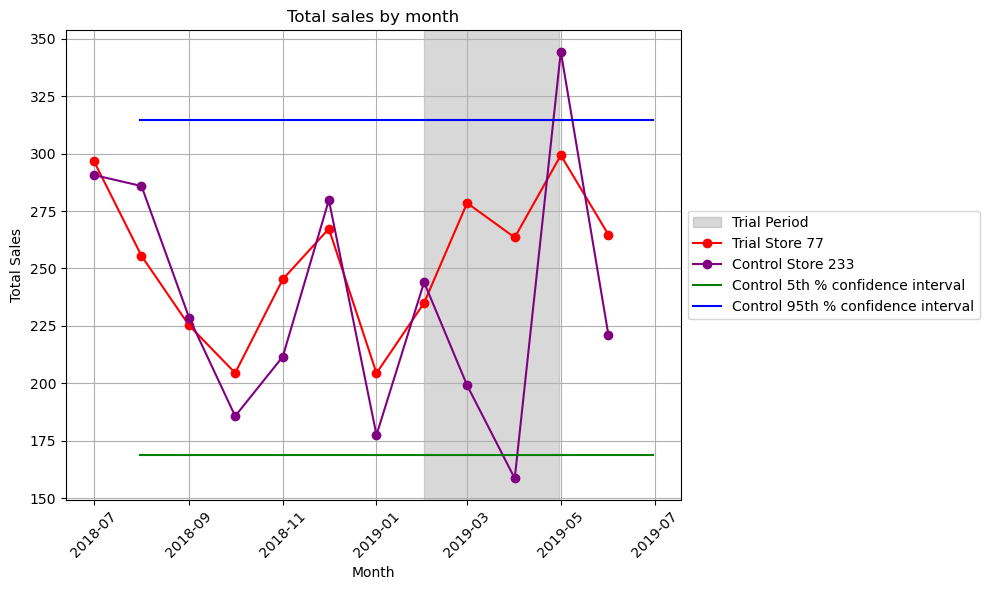

In [38]:
#Plot the sales of the control store, the sales of the trial stores and the 95th and 5th percentile value of sales of the control store.

percentile_df_1 = control_store_sales_1.copy()
percentile_df_1['5th_PERCENTILE_SALES'] = percentile_5_total_sales_1
percentile_df_1['95th_PERCENTILE_SALES'] = percentile_95_total_sales_1

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period (from 2019-02 to 2019-04)
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[77], marker='o', color = 'red', label='Trial Store 77')
plt.plot(pivot_data.index, pivot_data[233], marker='o', color = 'purple', label='Control Store 233')

plt.plot(control_store_sales_1['YEAR_MONTH'], [percentile_5_total_sales_1]*len(control_store_sales_1), linestyle='-', color='green', label='Control 5th % confidence interval')

# Plot the 95th percentile line for the control store
plt.plot(control_store_sales_1['YEAR_MONTH'], [percentile_95_total_sales_1]*len(control_store_sales_1), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Conclusion: while Control Store 233 does show some similarities in sales patterns to Trial Store 77 before the trial period, the significant divergence during and after the trial period indicates that Control Store 233 might not be the best match.
	The trial period has significantly boosted the sales of Trial Store 77.

In [39]:
#Scaling of Numbers of Customers control store's to consider any differences between stores in pre-trial period.

# Filter pre-trial data for trial store 77 and control store 233
num_of_cust_trial = df_pre_trial[df_pre_trial['STORE_NBR'] == 77]['NUM_CUSTOMERS'].sum()
num_of_cust_control_store = df_pre_trial[df_pre_trial['STORE_NBR'] == 233]['NUM_CUSTOMERS'].sum()

# Calculate scaling factor
scaling_factor_cust = num_of_cust_trial / num_of_cust_control_store
scaling_factor_cust

1.0033557046979866

In [40]:
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_77 = df_pre_trial[df_pre_trial['STORE_NBR'] == 77]
pre_trial_df_233 = df_pre_trial[df_pre_trial['STORE_NBR'] == 233]

# Scale the control store pre trial number of customers
pre_trial_df_233['SCALED_NUM_CUSTOMERS'] = round(pre_trial_df_233['NUM_CUSTOMERS'] * scaling_factor_cust)

# Merge the pre-trial data
pre_trial_merged_4 = pd.merge(
    pre_trial_df_77[['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'}),
    pre_trial_df_233[['YEAR_MONTH', 'SCALED_NUM_CUSTOMERS']].rename(columns={'SCALED_NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'}),
    on='YEAR_MONTH'
)
pre_trial_merged_4

,YEAR_MONTH,TRIAL_NUM_CUSTOMERS,CONTROL_NUM_CUSTOMERS
0,2018-07,51,51.0
1,2018-08,47,48.0
2,2018-09,42,42.0
3,2018-10,37,35.0
4,2018-11,41,40.0
5,2018-12,46,47.0
6,2019-01,35,35.0


In [41]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_4['PERCENTAGE_DIFF'] = (pre_trial_merged_4['TRIAL_NUM_CUSTOMERS'] - pre_trial_merged_4['CONTROL_NUM_CUSTOMERS']) / pre_trial_merged_4['CONTROL_NUM_CUSTOMERS'] * 100

pre_trial_mean_4 = pre_trial_merged_4['PERCENTAGE_DIFF'].mean()
pre_trial_std_4 = pre_trial_merged_4['PERCENTAGE_DIFF'].std()
pre_trial_n_4 = len(pre_trial_merged_4)

print("Pre-trial period mean percentage difference:", pre_trial_mean_4)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std_4)

Pre-trial period mean percentage difference: 0.5718989723548995
Pre-trial period standard deviation of percentage differences: 2.753204049376809


In [42]:
# Extract trial store and scaled control store number of customers for the trial period

customers_trial_4 = df_trial[df_trial['STORE_NBR'] == 77][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'})
customers_control_4 = df_trial[df_trial['STORE_NBR'] == 233][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'})
customers_control_4['CONTROL_NUM_CUSTOMERS'] = customers_control_4 ['CONTROL_NUM_CUSTOMERS'] * scaling_factor_cust

# Merge the trial data
trial_merged_4 = pd.merge(
    customers_trial_4,
    customers_control_4,
    on='YEAR_MONTH'
)

In [43]:
# Calculate the percentage difference for the trial period

trial_merged_4['PERCENTAGE_DIFF'] = (trial_merged_4['TRIAL_NUM_CUSTOMERS'] - trial_merged_4['CONTROL_NUM_CUSTOMERS']) / trial_merged_4['CONTROL_NUM_CUSTOMERS'] * 100
print("Trial period percentage differences:\n", trial_merged_4[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02        -0.334448
1    2019-03        24.581940
2    2019-04        56.142698


In [44]:
# Calculate the t-values for the trial period

trial_merged_4['T_VALUE'] = (trial_merged_4['PERCENTAGE_DIFF'] - pre_trial_mean_4) / (pre_trial_std_4 / np.sqrt(pre_trial_n_4))
print("Trial period percentage differences and t-values:\n", trial_merged_4[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF    T_VALUE
0    2019-02        -0.334448  -0.870974
1    2019-03        24.581940  23.072971
2    2019-04        56.142698  53.401968


In [45]:
# Calculate degrees of freedom
degrees_of_freedom_4 = pre_trial_n_4 - 1

# Find the 95th percentile of the t distribution
t_critical_value_4 = t.ppf(0.95, degrees_of_freedom_4)

print("95th percentile of the t distribution with", degrees_of_freedom_4, "degrees of freedom:", t_critical_value_4)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [46]:
customers_control_4 = final_summary[final_summary['STORE_NBR'] == 233]

In [47]:
# Group by month and calculate the 5th and 95th percentile for each month
percentile_95_num_cust_4 = np.percentile(customers_control_4['NUM_CUSTOMERS'], 95)
print("95th Percentile of Number of Customers for Control Store 233:", percentile_95_num_cust_4)

percentile_5_num_cust_4 = np.percentile(customers_control_4['NUM_CUSTOMERS'], 5)
print("5th Percentile of Number of Customers for Control Store 233:", percentile_5_num_cust_4)

95th Percentile of Number of Customers for Control Store 233: 53.699999999999996
5th Percentile of Number of Customers for Control Store 233: 32.75


In [48]:
monthly_customers_4 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

In [49]:
# Convert period data to timestamps
monthly_customers_4['YEAR_MONTH'] = monthly_customers_4['YEAR_MONTH'].dt.to_timestamp()

In [50]:
# Pivot the data for visualization
pivot_data = monthly_customers_4.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS')

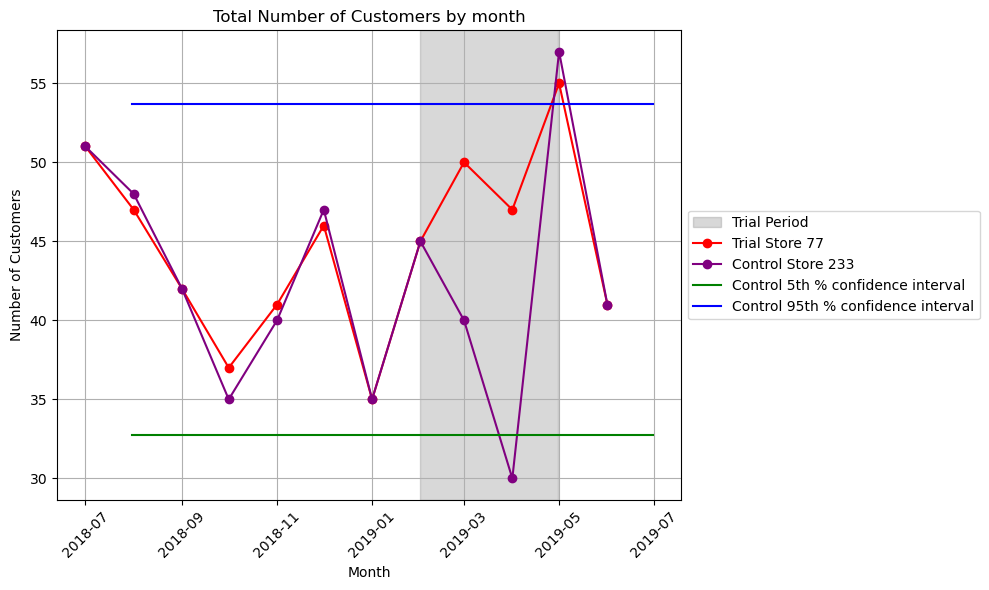

In [51]:
#Plot number of customers of the control store, the number of customers of the trial stores and the 95th and 5th percentile value of the control store.


percentile_df_4 = customers_control_4.copy()
percentile_df_4['5th_PERCENTILE_SALES'] = percentile_5_num_cust_4
percentile_df_1['95th_PERCENTILE_SALES'] = percentile_95_num_cust_4

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period (from 2019-02 to 2019-04)
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[77], marker='o', color = 'red', label='Trial Store 77')
plt.plot(pivot_data.index, pivot_data[233], marker='o', color = 'purple', label='Control Store 233')

plt.plot(customers_control_4['YEAR_MONTH'], [percentile_5_num_cust_4]*len(customers_control_4), linestyle='-', color='green', label='Control 5th % confidence interval')
plt.plot(customers_control_4['YEAR_MONTH'], [percentile_95_num_cust_4]*len(customers_control_4), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total Number of Customers by month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The trial period has significantly boosted the number of customers as well as Total sales for Trial Store 77. But Control store 233 shows significant volatility in customer numbers, espesially in trial period.

Continue with trial store 86. We’ll select control stores based on how similar monthly total sales and monthly number of customers are to the trial stores.

In [52]:
def find_control_store(trial_store_id, data, method='euclidean'):
    
    # Define metrics to compare
    metrics = ['TOTAL_SALES', 'NUM_CUSTOMERS', 'TRANSACTIONS_PER_CUSTOMER']
    
    # Extract data for the trial store
    trial_store_data = data[data['STORE_NBR'] == trial_store_id][metrics].values.flatten()  
    
    # Initialize variables to track the best match
    best_match_id = None
    best_match_score = float('inf') if method == 'euclidean' else -float('inf')
    
    # Iterate over each store to calculate similarity
    for store_id in data['STORE_NBR'].unique():
        if store_id == trial_store_id:
            continue
            
        # Extract data for the current store
        store_data = data[data['STORE_NBR'] == store_id][metrics].values.flatten()  # Flatten the array
        
        # Ensure the lengths of trial_store_data and store_data are equal
        min_length = min(len(trial_store_data), len(store_data))
        trial_store_data = trial_store_data[:min_length]
        store_data = store_data[:min_length]
        
        # Calculate similarity based on the chosen method
        if method == 'euclidean':
            score = euclidean(trial_store_data, store_data)
            if score < best_match_score:
                best_match_score = score
                best_match_id = store_id
        elif method == 'pearson':
            score, _ = pearsonr(trial_store_data, store_data)
            if score > best_match_score:
                best_match_score = score
                best_match_id = store_id
    
    return best_match_id

# Example usage:
trial_store_id = 86
data = pd.DataFrame(final_summary)  
control_store_id = find_control_store(trial_store_id, data)
print("Control store ID:", control_store_id)

Control store ID: 162


The control store for the trial store 86 is 162.

Create visualisation and check if the drivers are indeed similar in the period before the trial.

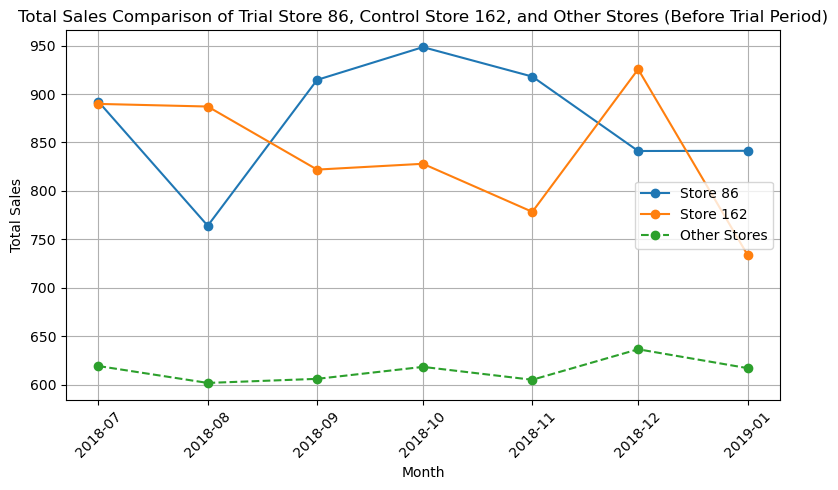

In [53]:
#Total sales visualisation for the trial store 86 and control store 162.

aggregated_data_3 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_3['YEAR_MONTH'] = aggregated_data_3['YEAR_MONTH'].dt.to_timestamp()


# Calculate the average total sales for stores other than 86 and 162
other_stores_data = aggregated_data_3[~aggregated_data_3['STORE_NBR'].isin([86, 162])]
average_other_sales = other_stores_data.groupby('YEAR_MONTH')['TOTAL_SALES'].mean().reset_index()
average_other_sales['STORE_NBR'] = 'Average Other Stores'

# Append the average total sales to the aggregated data
aggregated_data_3 = pd.concat([aggregated_data_3, average_other_sales], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_3.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')

# Plotting the sales data
plt.figure(figsize=(8, 5))

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[86], marker='o', label='Store 86')
plt.plot(pivot_data.index, pivot_data[162], marker='o', label='Store 162')

# Plot the average total sales for other stores
plt.plot(pivot_data.index, pivot_data['Average Other Stores'], marker='o', linestyle='--', label='Other Stores')

# Adding titles and labels
plt.title('Total Sales Comparison of Trial Store 86, Control Store 162, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Store 86 generally performs better in terms of higher sales peaks compared to Store 162.

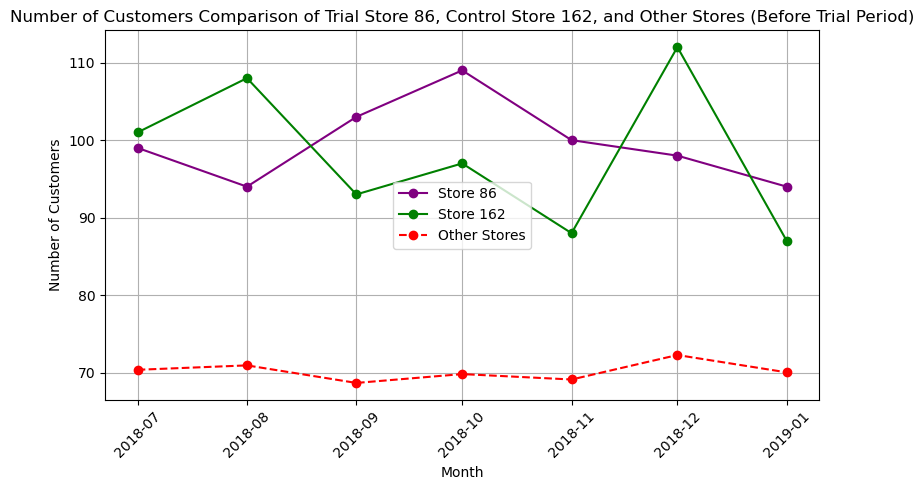

In [54]:
#Number of Customers Visualition

aggregated_data_4 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_4['YEAR_MONTH'] = aggregated_data_4['YEAR_MONTH'].dt.to_timestamp()

# Calculate the average number of customers for stores other than 86 and 162
other_stores_data = aggregated_data_4[~aggregated_data_4['STORE_NBR'].isin([86, 162])]
average_other_customers = other_stores_data.groupby('YEAR_MONTH')['NUM_CUSTOMERS'].mean().reset_index()
average_other_customers['STORE_NBR'] = 'Average Other Customers'

# Append the average data to the aggregated data
aggregated_data_4 = pd.concat([aggregated_data_4, average_other_customers], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_4.pivot_table(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS', aggfunc='sum')


plt.figure(figsize=(8, 5))

plt.plot(pivot_data.index, pivot_data[86], marker='o', label='Store 86', color = 'purple')
plt.plot(pivot_data.index, pivot_data[162], marker='o', label='Store 162', color = 'green')

plt.plot(pivot_data.index, pivot_data['Average Other Customers'], marker='o', linestyle='--', label='Other Stores', color = 'red')

plt.title('Number of Customers Comparison of Trial Store 86, Control Store 162, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Both Stores show significant fluctuations in the number of customers compared to Other Stores. These two stores exhibit varying trends, often with one peaking while the other dips, though there are periods where they align.

Assessment of trial for stores 86 and 162 (Trial period lasted from the 1st of February till the end of April 2019). 
Lets see if there has been an uplift in overall chip sales.

In [55]:
#We start with scaling of control store's Total sales to consider any differences between stores in pre-trial period.
# Filter pre-trial data for trial store 86 and control store 162

trial_store_sales_2 = df_pre_trial[df_pre_trial['STORE_NBR'] == 86]['TOTAL_SALES'].sum()
control_store_sales_2 = df_pre_trial[df_pre_trial['STORE_NBR'] == 162]['TOTAL_SALES'].sum()

# Calculate scaling factor
scaling_factor_2 = trial_store_sales_2 / control_store_sales_2
scaling_factor_2

1.043470476904977

In [56]:
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_86 = df_pre_trial[df_pre_trial['STORE_NBR'] == 86]
pre_trial_df_162 = df_pre_trial[df_pre_trial['STORE_NBR'] == 162]

# Scale the control store pre trial sales
pre_trial_df_162['SCALED_TOTAL_SALES'] = pre_trial_df_162['TOTAL_SALES'] * scaling_factor_2

# Merge the pre-trial data
pre_trial_merged_2 = pd.merge(
    pre_trial_df_86[['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'}),
    pre_trial_df_162[['YEAR_MONTH', 'SCALED_TOTAL_SALES']].rename(columns={'SCALED_TOTAL_SALES': 'CONTROL_SALES'}),
    on='YEAR_MONTH'
)
pre_trial_merged_2

,YEAR_MONTH,TRIAL_STORE_SALES,CONTROL_SALES
0,2018-07,892.20,928.480030
1,2018-08,764.05,925.662660
2,2018-09,914.60,857.732732
3,2018-10,948.40,863.993555
4,2018-11,918.00,812.237419
5,2018-12,841.20,965.836273
6,2019-01,841.40,765.907330


In [57]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_2['PERCENTAGE_DIFF'] = (pre_trial_merged_2['TRIAL_STORE_SALES'] - pre_trial_merged_2['CONTROL_SALES']) / pre_trial_merged_2['CONTROL_SALES'] * 100

pre_trial_mean_2 = pre_trial_merged_2['PERCENTAGE_DIFF'].mean()
pre_trial_std_2 = pre_trial_merged_2['PERCENTAGE_DIFF'].std()
pre_trial_n_2 = len(pre_trial_merged_2)

print("Pre-trial period mean percentage difference:", pre_trial_mean_2)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std_2)

Pre-trial period mean percentage difference: 0.7151391053533876
Pre-trial period standard deviation of percentage differences: 12.173297647775476


In [58]:
# Extract trial store sales and scaled control store sales for the trial period

trial_store_sales_2 = df_trial[df_trial['STORE_NBR'] == 86][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'})
trial_control_sales_2 = df_trial[df_trial['STORE_NBR'] == 162][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'CONTROL_SALES'})
trial_control_sales_2['CONTROL_SALES'] = trial_control_sales_2['CONTROL_SALES'] * scaling_factor_2

# Merge the trial data
trial_merged_2 = pd.merge(
    trial_store_sales_2,
    trial_control_sales_2,
    on='YEAR_MONTH'
)

In [59]:
# Calculate the percentage difference for the trial period

trial_merged_2['PERCENTAGE_DIFF'] = (trial_merged_2['TRIAL_STORE_SALES'] - trial_merged_2['CONTROL_SALES']) / trial_merged_2['CONTROL_SALES'] * 100
print("Trial period percentage differences:\n", trial_merged_2[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02        20.877974
1    2019-03        18.929660
2    2019-04       -13.359156


The positive percentage differences in sales indicate that the trial interventions were effective in boosting sales. This is corroborated by the observed increases in the number of customers and total sales for the trial store in these months. But in April 2019 we observe the negative percentage difference.

In [60]:
# Calculate the t-values for the trial period

trial_merged_2['T_VALUE'] = (trial_merged_2['PERCENTAGE_DIFF'] - pre_trial_mean_2) / (pre_trial_std_2 / np.sqrt(pre_trial_n_2))

print("Trial period percentage differences and t-values:\n", trial_merged_2[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF   T_VALUE
0    2019-02        20.877974  4.382202
1    2019-03        18.929660  3.958754
2    2019-04       -13.359156 -3.058915


In [61]:
# Calculate degrees of freedom
degrees_of_freedom_2 = pre_trial_n_2 - 1

# Find the 95th percentile of the t distribution

t_critical_value_2 = t.ppf(0.95, degrees_of_freedom_2)
print("95th percentile of the t distribution with", degrees_of_freedom_2, "degrees of freedom:", t_critical_value_2)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [62]:
control_store_sales_2 = final_summary[final_summary['STORE_NBR'] == 162]

In [63]:
# Group by month and calculate the 95th percentile for each month
percentile_95_total_sales_2 = np.percentile(control_store_sales_2['TOTAL_SALES'], 95)
print("95th Percentile of Total Sales for Control Store 162:", percentile_95_total_sales_2)

95th Percentile of Total Sales for Control Store 162: 931.27


In [64]:
percentile_5_total_sales_2 = np.percentile(control_store_sales_2['TOTAL_SALES'], 5)
print("5th Percentile of Total Sales for Control Store 162:", percentile_5_total_sales_2)

5th Percentile of Total Sales for Control Store 162: 713.38


In [65]:
monthly_sales_2 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()


In [66]:
# Convert period data to timestamps
monthly_sales_2['YEAR_MONTH'] = monthly_sales_2['YEAR_MONTH'].dt.to_timestamp()

In [67]:
# Pivot the data for visualization
pivot_data = monthly_sales_2.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')


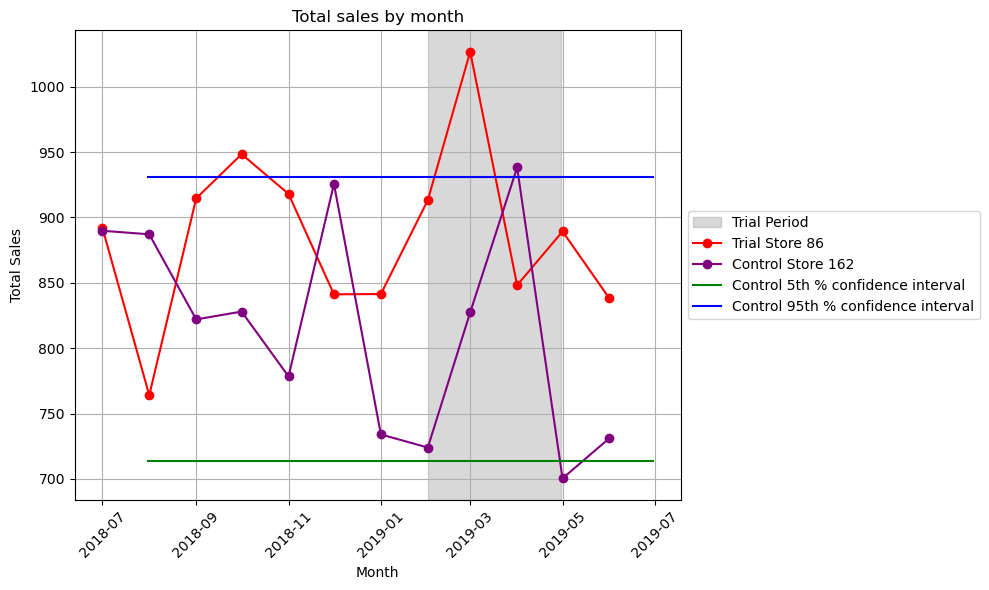

In [68]:
#Plot the sales of the control store, the sales of the trial stores and the 95th and 5th percentile value of sales of the control store.

percentile_df_2 = control_store_sales_2.copy()
percentile_df_2['5th_PERCENTILE_SALES'] = percentile_5_total_sales_2
percentile_df_2['95th_PERCENTILE_SALES'] = percentile_95_total_sales_2

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period (from 2019-02 to 2019-04)
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[86], marker='o', color = 'red', label='Trial Store 86')
plt.plot(pivot_data.index, pivot_data[162], marker='o', color = 'purple', label='Control Store 162')

plt.plot(control_store_sales_2['YEAR_MONTH'], [percentile_5_total_sales_2]*len(control_store_sales_2), linestyle='-', color='green', label='Control 5th % confidence interval')
plt.plot(control_store_sales_2['YEAR_MONTH'], [percentile_95_total_sales_2]*len(control_store_sales_2), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Control Store 162’s performance highlights the effectiveness of the trial interventions for Trial Store 86.Control Store 162’s sales tend to be more stable and closer to these confidence intervals, indicating less variability The significant drop in sales for the control store in April 2019 further emphasizes the need for targeted interventions to improve performance.


Scaling of Numbers of Customers control store's to consider any differences between stores in pre-trial period.

In [69]:
# Filter pre-trial data for trial store 86 and control store 162
num_of_cust_trial_86 = df_pre_trial[df_pre_trial['STORE_NBR'] == 86]['NUM_CUSTOMERS'].sum()
num_of_cust_control_store_162 = df_pre_trial[df_pre_trial['STORE_NBR'] == 162]['NUM_CUSTOMERS'].sum()

# Calculate scaling factor
scaling_factor_cust_2 = num_of_cust_trial_86 / num_of_cust_control_store_162
scaling_factor_cust_2

1.0160349854227406

In [70]:
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_86 = df_pre_trial[df_pre_trial['STORE_NBR'] == 86]
pre_trial_df_162 = df_pre_trial[df_pre_trial['STORE_NBR'] == 162]

# Scale the control store pre trial number of customers
pre_trial_df_162['SCALED_NUM_CUSTOMERS'] = round(pre_trial_df_162['NUM_CUSTOMERS'] * scaling_factor_cust_2)

# Merge the pre-trial data
pre_trial_merged_5 = pd.merge(
    pre_trial_df_86[['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'}),
    pre_trial_df_162[['YEAR_MONTH', 'SCALED_NUM_CUSTOMERS']].rename(columns={'SCALED_NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'}),
    on='YEAR_MONTH'
)
pre_trial_merged_5

,YEAR_MONTH,TRIAL_NUM_CUSTOMERS,CONTROL_NUM_CUSTOMERS
0,2018-07,99,103.0
1,2018-08,94,110.0
2,2018-09,103,94.0
3,2018-10,109,99.0
4,2018-11,100,89.0
5,2018-12,98,114.0
6,2019-01,94,88.0


In [71]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_5['PERCENTAGE_DIFF'] = (pre_trial_merged_5['TRIAL_NUM_CUSTOMERS'] - pre_trial_merged_5['CONTROL_NUM_CUSTOMERS']) / pre_trial_merged_5['CONTROL_NUM_CUSTOMERS'] * 100

pre_trial_mean_5 = pre_trial_merged_5['PERCENTAGE_DIFF'].mean()
pre_trial_std_5 = pre_trial_merged_5['PERCENTAGE_DIFF'].std()
pre_trial_n_5 = len(pre_trial_merged_5)

print("Pre-trial period mean percentage difference:", pre_trial_mean_5)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std_5)

Pre-trial period mean percentage difference: 0.9127390222445994
Pre-trial period standard deviation of percentage differences: 11.624333383597914


In [72]:
# Extract trial store sales and scaled control store numbers of customers for the trial period

customers_trial_5 = df_trial[df_trial['STORE_NBR'] == 86][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'})
customers_control_5 = df_trial[df_trial['STORE_NBR'] == 162][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'})
customers_control_5['CONTROL_NUM_CUSTOMERS'] = customers_control_5 ['CONTROL_NUM_CUSTOMERS'] * scaling_factor_cust_2

# Merge the trial data
trial_merged_5 = pd.merge(
    customers_trial_5,
    customers_control_5,
    on='YEAR_MONTH'
)

In [73]:
# Calculate the percentage difference for the trial period

trial_merged_5['PERCENTAGE_DIFF'] = (trial_merged_5['TRIAL_NUM_CUSTOMERS'] - trial_merged_5['CONTROL_NUM_CUSTOMERS']) / trial_merged_5['CONTROL_NUM_CUSTOMERS'] * 100
print("Trial period percentage differences:\n", trial_merged_5[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02        18.327342
1    2019-03        21.704386
2    2019-04         0.332911


In [74]:
# Calculate the t-values for the trial period

trial_merged_5['T_VALUE'] = (trial_merged_5['PERCENTAGE_DIFF'] - pre_trial_mean_5) / (pre_trial_std_5 / np.sqrt(pre_trial_n_5))
print("Trial period percentage differences and t-values:\n", trial_merged_5[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF   T_VALUE
0    2019-02        18.327342  3.963643
1    2019-03        21.704386  4.732274
2    2019-04         0.332911 -0.131972


In [75]:
# Calculate degrees of freedom
degrees_of_freedom_5 = pre_trial_n_5 - 1

# Find the 95th percentile of the t distribution
t_critical_value_5 = t.ppf(0.95, degrees_of_freedom_5)

print("95th percentile of the t distribution with", degrees_of_freedom_5, "degrees of freedom:", t_critical_value_5)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [76]:
customers_control_5 = final_summary[final_summary['STORE_NBR'] == 162]
customers_control_5.head()

,YEAR_MONTH,STORE_NBR,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS,TOTAL_CHIPS,TRANSACTIONS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
157,2018-07,162,889.8,101,127,254,1.26,3.48
421,2018-08,162,887.1,108,130,248,1.20,3.58
686,2018-09,162,822.0,93,118,236,1.27,3.45
951,2018-10,162,828.0,97,116,232,1.20,3.59
1215,2018-11,162,778.4,88,113,226,1.28,3.40


In [77]:
# Group by month and calculate the 5th and 95th percentile for each month

percentile_95_num_cust_5 = np.percentile(customers_control_5['NUM_CUSTOMERS'], 95)
print("95th Percentile of Number of Customers for Control Store 162:", percentile_95_num_cust_5)


95th Percentile of Number of Customers for Control Store 162: 109.8


In [78]:
percentile_5_num_cust_5 = np.percentile(customers_control_5['NUM_CUSTOMERS'], 5)
print("5th Percentile of Number of Customers for Control Store 162:", percentile_5_num_cust_5)

5th Percentile of Number of Customers for Control Store 162: 85.1


In [79]:
monthly_customers_5 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

In [80]:
# Convert period data to timestamps
monthly_customers_5['YEAR_MONTH'] = monthly_customers_5['YEAR_MONTH'].dt.to_timestamp()

In [81]:
# Pivot the data for visualization
pivot_data = monthly_customers_5.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS')

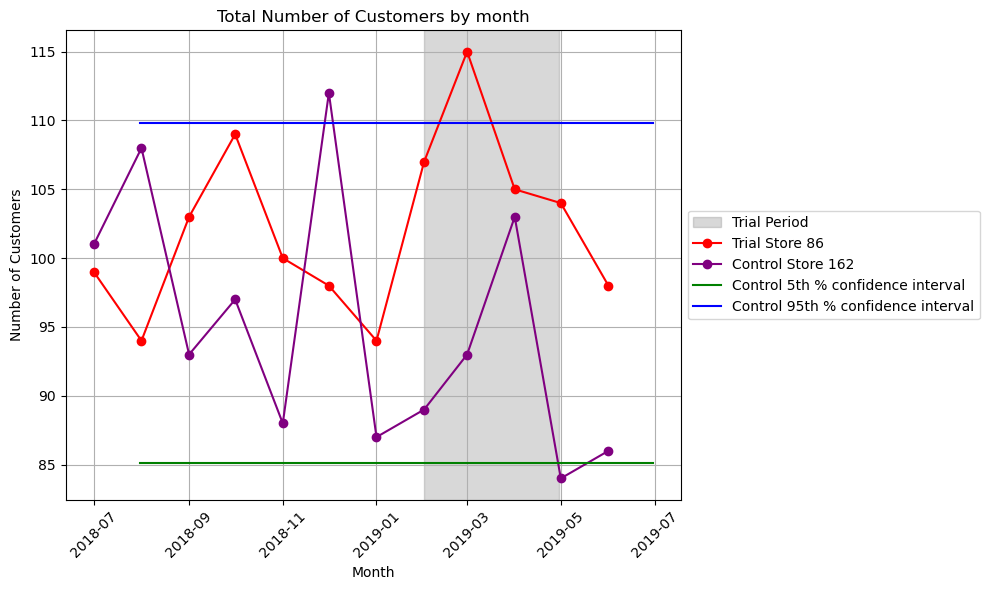

In [82]:
#Plot number of customers of the control store, the number of customers of the trial stores and the 95th and 5th percentile value of the control store.

percentile_df_5 = customers_control_5.copy()
percentile_df_5['5th_PERCENTILE_SALES'] = percentile_5_num_cust_5
percentile_df_5['95th_PERCENTILE_SALES'] = percentile_95_num_cust_5

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period (from 2019-02 to 2019-04)
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[86], marker='o', color = 'red', label='Trial Store 86')
plt.plot(pivot_data.index, pivot_data[162], marker='o', color = 'purple', label='Control Store 162')

plt.plot(customers_control_5['YEAR_MONTH'], [percentile_5_num_cust_5]*len(customers_control_5), linestyle='-', color='green', label='Control 5th % confidence interval')
plt.plot(customers_control_5['YEAR_MONTH'], [percentile_95_num_cust_5]*len(customers_control_5), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total Number of Customers by month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The trial period demonstrated a clear positive impact on the number of customers for Trial Store 86, with significant increases in February and March 2019

Lets move to the trial store 88. We’ll select control stores based on how similar monthly total sales and monthly number of customers are to the trial stores.

In [83]:
def find_control_store(trial_store_id, data, method='euclidean'):
   
    # Define metrics to compare
    metrics = ['TOTAL_SALES', 'NUM_CUSTOMERS', 'TRANSACTIONS_PER_CUSTOMER']
    
    # Extract data for the trial store
    trial_store_data = data[data['STORE_NBR'] == trial_store_id][metrics].values.flatten()  
    
    # Initialize variables to track the best match
    best_match_id = None
    best_match_score = float('inf') if method == 'euclidean' else -float('inf')
    
    # Iterate over each store to calculate similarity
    for store_id in data['STORE_NBR'].unique():
        if store_id == trial_store_id:
            continue
            
        # Extract data for the current store
        store_data = data[data['STORE_NBR'] == store_id][metrics].values.flatten()  # Flatten the array
        
        # Ensure the lengths of trial_store_data and store_data are equal
        min_length = min(len(trial_store_data), len(store_data))
        trial_store_data = trial_store_data[:min_length]
        store_data = store_data[:min_length]
        
        # Calculate similarity based on the chosen method
        if method == 'euclidean':
            score = euclidean(trial_store_data, store_data)
            if score < best_match_score:
                best_match_score = score
                best_match_id = store_id
        elif method == 'pearson':
            score, _ = pearsonr(trial_store_data, store_data)
            if score > best_match_score:
                best_match_score = score
                best_match_id = store_id
    
    return best_match_id

trial_store_id = 88
data = pd.DataFrame(final_summary)  
control_store_id = find_control_store(trial_store_id, data)
print("Control store ID:", control_store_id)

Control store ID: 199


The control store for the trial store 88 is 199.

Create visualisation and check if the drivers are indeed similar in the period before the trial.

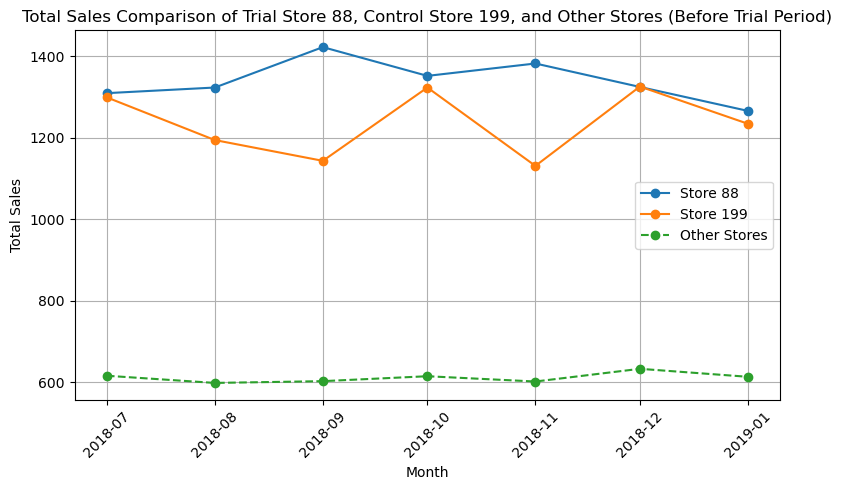

In [84]:
#Total sales visualisation for the trial store 88 and control store 199.

aggregated_data_5 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_5['YEAR_MONTH'] = aggregated_data_5['YEAR_MONTH'].dt.to_timestamp()

# Calculate the average total sales for stores other than 88 and 199
other_stores_data = aggregated_data_5[~aggregated_data_5['STORE_NBR'].isin([88, 199])]
average_other_sales = other_stores_data.groupby('YEAR_MONTH')['TOTAL_SALES'].mean().reset_index()
average_other_sales['STORE_NBR'] = 'Average Other Stores'

# Append the average total sales to the aggregated data
aggregated_data_5 = pd.concat([aggregated_data_5, average_other_sales], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_5.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')

# Plotting the sales data
plt.figure(figsize=(8, 5))

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[88], marker='o', label='Store 88')
plt.plot(pivot_data.index, pivot_data[199], marker='o', label='Store 199')

# Plot the average total sales for other stores
plt.plot(pivot_data.index, pivot_data['Average Other Stores'], marker='o', linestyle='--', label='Other Stores')

# Adding titles and labels
plt.title('Total Sales Comparison of Trial Store 88, Control Store 199, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Trial Store 88 consistently outperforms Control Store 199 in terms of total sales, suggesting that whatever strategies or conditions are present in Trial Store 88 are more effective.

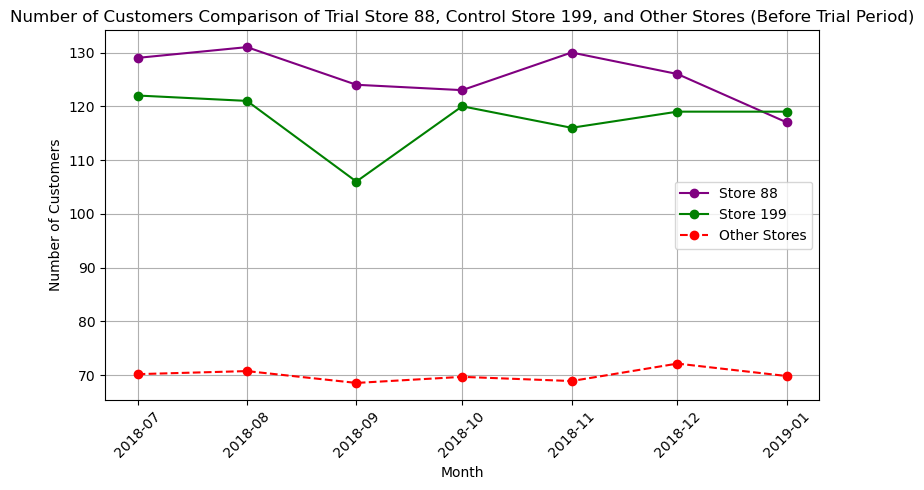

In [85]:
#Number of Customers Visualition

aggregated_data_6 = df_pre_trial.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

# Convert period data to timestamps
aggregated_data_6['YEAR_MONTH'] = aggregated_data_6['YEAR_MONTH'].dt.to_timestamp()

# Calculate the average number of customers for stores other than 88 and 199
other_stores_data = aggregated_data_6[~aggregated_data_6['STORE_NBR'].isin([88, 199])]
average_other_customers = other_stores_data.groupby('YEAR_MONTH')['NUM_CUSTOMERS'].mean().reset_index()
average_other_customers['STORE_NBR'] = 'Average Other Customers'

# Append the average data to the aggregated data
aggregated_data_6 = pd.concat([aggregated_data_6, average_other_customers], ignore_index=True)

# Pivot the data for visualization
pivot_data = aggregated_data_6.pivot_table(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS', aggfunc='sum')


plt.figure(figsize=(8, 5))

plt.plot(pivot_data.index, pivot_data[88], marker='o', label='Store 88', color = 'purple')
plt.plot(pivot_data.index, pivot_data[199], marker='o', label='Store 199', color = 'green')

plt.plot(pivot_data.index, pivot_data['Average Other Customers'], marker='o', linestyle='--', 
         label='Other Stores', color ='red')

plt.title('Number of Customers Comparison of Trial Store 88, Control Store 199, and Other Stores (Before Trial Period)')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Trial Store 88 consistently has a higher number of customers as well compared to Control Store 199

Assessment of trial for stores 88 and 199 (Trial period lasted from the 1st of February till the end of April 2019). 
Lets see if there has been an uplift in overall chip sales.

In [86]:
#We start with scaling of control store's Total sales to consider any differences between stores in pre-trial period.
# Filter pre-trial data for trial store 88 and control store 199

trial_store_sales_3 = df_pre_trial[df_pre_trial['STORE_NBR'] == 88]['TOTAL_SALES'].sum()
control_store_sales_3 = df_pre_trial[df_pre_trial['STORE_NBR'] == 199]['TOTAL_SALES'].sum()

# Calculate scaling factor
scaling_factor_3 = trial_store_sales_3 / control_store_sales_3
scaling_factor_3

1.0842577186171196

In [87]:
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_88 = df_pre_trial[df_pre_trial['STORE_NBR'] == 88]
pre_trial_df_199 = df_pre_trial[df_pre_trial['STORE_NBR'] == 199]

# Scale the control store pre trial sales
pre_trial_df_199['SCALED_TOTAL_SALES'] = pre_trial_df_199['TOTAL_SALES'] * scaling_factor_3

# Merge the pre-trial data
pre_trial_merged_3 = pd.merge(
    pre_trial_df_88[['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'}),
    pre_trial_df_199[['YEAR_MONTH', 'SCALED_TOTAL_SALES']].rename(columns={'SCALED_TOTAL_SALES': 'CONTROL_SALES'}),
    on='YEAR_MONTH'
)
pre_trial_merged_3

,YEAR_MONTH,TRIAL_STORE_SALES,CONTROL_SALES
0,2018-07,1310.0,1409.101331
1,2018-08,1323.8,1295.471122
2,2018-09,1423.0,1240.173979
3,2018-10,1352.4,1435.340368
4,2018-11,1382.8,1226.729183
5,2018-12,1325.2,1437.942586
6,2019-01,1266.4,1338.841431


In [88]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_3['PERCENTAGE_DIFF'] = (pre_trial_merged_3['TRIAL_STORE_SALES'] - pre_trial_merged_3['CONTROL_SALES']) / pre_trial_merged_3['CONTROL_SALES'] * 100

pre_trial_mean_3 = pre_trial_merged_3['PERCENTAGE_DIFF'].mean()
pre_trial_std_3 = pre_trial_merged_3['PERCENTAGE_DIFF'].std()
pre_trial_n_3 = len(pre_trial_merged_3)

print("Pre-trial period mean percentage difference:", pre_trial_mean_3)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std_3)

Pre-trial period mean percentage difference: 0.5126498498814785
Pre-trial period standard deviation of percentage differences: 9.624045071192365


In [89]:
# Extract trial store sales and scaled control store sales for the trial period

trial_store_sales_3 = df_trial[df_trial['STORE_NBR'] == 88][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'TRIAL_STORE_SALES'})
trial_control_sales_3 = df_trial[df_trial['STORE_NBR'] == 199][['YEAR_MONTH', 'TOTAL_SALES']].rename(columns={'TOTAL_SALES': 'CONTROL_SALES'})
trial_control_sales_3['CONTROL_SALES'] = trial_control_sales_3['CONTROL_SALES'] * scaling_factor_3

# Merge the trial data
trial_merged_3 = pd.merge(
    trial_store_sales_3,
    trial_control_sales_3,
    on='YEAR_MONTH'
)

In [90]:
# Calculate the percentage difference for the trial period

trial_merged_3['PERCENTAGE_DIFF'] = (trial_merged_3['TRIAL_STORE_SALES'] - trial_merged_3['CONTROL_SALES']) / trial_merged_3['CONTROL_SALES'] * 100
print("Trial period percentage differences:\n", trial_merged_3[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02         2.491622
1    2019-03         1.946028
2    2019-04        12.256398


The trial period demonstrated a clear positive impact on the Total sales for Trial Store 88, with significant increases particularly in April 2019.

In [91]:
# Calculate the t-values for the trial period

trial_merged_3['T_VALUE'] = (trial_merged_3['PERCENTAGE_DIFF'] - pre_trial_mean_3) / (pre_trial_std_3 / np.sqrt(pre_trial_n_3))
print("Trial period percentage differences and t-values:\n", trial_merged_3[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF   T_VALUE
0    2019-02         2.491622  0.544040
1    2019-03         1.946028  0.394051
2    2019-04        12.256398  3.228480


In [92]:
# Calculate degrees of freedom
degrees_of_freedom_3 = pre_trial_n_3 - 1

# Find the 95th percentile of the t distribution
t_critical_value_3 = t.ppf(0.95, degrees_of_freedom_2)
print("95th percentile of the t distribution with", degrees_of_freedom_3, "degrees of freedom:", t_critical_value_3)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [93]:
control_store_sales_3 = final_summary[final_summary['STORE_NBR'] == 199]

In [94]:
# Group by month and calculate the 5th and 95th percentile for each month

percentile_95_total_sales_3 = np.percentile(control_store_sales_3['TOTAL_SALES'], 95)
print("95th Percentile of Total Sales for Control Store 199:", percentile_95_total_sales_3)

percentile_5_total_sales_3 = np.percentile(control_store_sales_3['TOTAL_SALES'], 5)
print("5th Percentile of Total Sales for Control Store 162:", percentile_5_total_sales_2)

95th Percentile of Total Sales for Control Store 199: 1330.79
5th Percentile of Total Sales for Control Store 162: 713.38


In [95]:
monthly_sales_3 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOTAL_SALES'].sum().reset_index()


In [96]:
# Convert period data to timestamps
monthly_sales_3['YEAR_MONTH'] = monthly_sales_3['YEAR_MONTH'].dt.to_timestamp()

In [97]:
# Pivot the data for visualization
pivot_data = monthly_sales_3.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOTAL_SALES')

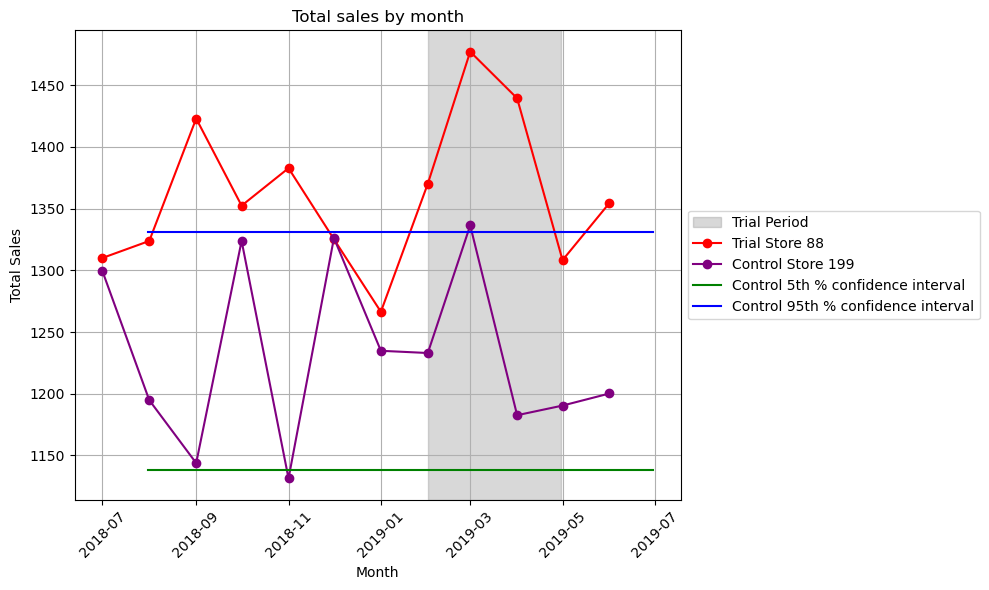

In [98]:
#Plot the sales of the control store, the sales of the trial stores and the 95th and 5th percentile value of sales of the control store.

percentile_df_3 = control_store_sales_3.copy()
percentile_df_3['5th_PERCENTILE_SALES'] = percentile_5_total_sales_3
percentile_df_3['95th_PERCENTILE_SALES'] = percentile_95_total_sales_3

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period 
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[88], marker='o', color = 'red', label='Trial Store 88')
plt.plot(pivot_data.index, pivot_data[199], marker='o', color = 'purple', label='Control Store 199')

plt.plot(control_store_sales_3['YEAR_MONTH'], [percentile_5_total_sales_3]*len(control_store_sales_3), linestyle='-', color='green', label='Control 5th % confidence interval')
plt.plot(control_store_sales_3['YEAR_MONTH'], [percentile_95_total_sales_3]*len(control_store_sales_3), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The plot shows a significant increase in sales during the trial period for Trial store 88 (February to April 2019), peaking above 1400 in March 2019. This indicates a strong positive impact of the trial interventions. Trial Store 88’s sales generally stay above the 95th percent confidence interval, indicating consistently higher sales compared to what is statistically expected for Control Store 199.

Scaling of Numbers of Customers control store's to consider any differences between stores in pre-trial period.

In [99]:
# Filter pre-trial data for trial store 88 and control store 199
num_of_cust_trial_88 = df_pre_trial[df_pre_trial['STORE_NBR'] == 88]['NUM_CUSTOMERS'].sum()
num_of_cust_control_store_199 = df_pre_trial[df_pre_trial['STORE_NBR'] == 199]['NUM_CUSTOMERS'].sum()

# Calculate scaling factor
scaling_factor_cust_3 = num_of_cust_trial_88 / num_of_cust_control_store_199
scaling_factor_cust_3

1.069258809234508

In [100]:
#As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

pre_trial_df_88 = df_pre_trial[df_pre_trial['STORE_NBR'] == 88]
pre_trial_df_199 = df_pre_trial[df_pre_trial['STORE_NBR'] == 199]

# Scale the control store pre trial number of customers
pre_trial_df_199['SCALED_NUM_CUSTOMERS'] = round(pre_trial_df_199['NUM_CUSTOMERS'] * scaling_factor_cust_3)

# Merge the pre-trial data
pre_trial_merged_6 = pd.merge(
    pre_trial_df_88[['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'}),
    pre_trial_df_199[['YEAR_MONTH', 'SCALED_NUM_CUSTOMERS']].rename(columns={'SCALED_NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'}),
    on='YEAR_MONTH'
)
pre_trial_merged_6

,YEAR_MONTH,TRIAL_NUM_CUSTOMERS,CONTROL_NUM_CUSTOMERS
0,2018-07,129,130.0
1,2018-08,131,129.0
2,2018-09,124,113.0
3,2018-10,123,128.0
4,2018-11,130,124.0
5,2018-12,126,127.0
6,2019-01,117,127.0


In [101]:
# Calculate the mean and standard deviation of the percentage differences in the pre-trial period

pre_trial_merged_6['PERCENTAGE_DIFF'] = (pre_trial_merged_6['TRIAL_NUM_CUSTOMERS'] - pre_trial_merged_6['CONTROL_NUM_CUSTOMERS']) / pre_trial_merged_6['CONTROL_NUM_CUSTOMERS'] * 100

pre_trial_mean_6 = pre_trial_merged_6['PERCENTAGE_DIFF'].mean()
pre_trial_std_6 = pre_trial_merged_6['PERCENTAGE_DIFF'].std()
pre_trial_n_6 = len(pre_trial_merged_6)

print("Pre-trial period mean percentage difference:", pre_trial_mean_6)
print("Pre-trial period standard deviation of percentage differences:", pre_trial_std_6)

Pre-trial period mean percentage difference: 0.3981017795127781
Pre-trial period standard deviation of percentage differences: 5.743674735775625


In [102]:
# Extract trial store and scaled control store number of customers for the trial period

customers_trial_6 = df_trial[df_trial['STORE_NBR'] == 88][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'TRIAL_NUM_CUSTOMERS'})
customers_control_6 = df_trial[df_trial['STORE_NBR'] == 199][['YEAR_MONTH', 'NUM_CUSTOMERS']].rename(columns={'NUM_CUSTOMERS': 'CONTROL_NUM_CUSTOMERS'})
customers_control_6['CONTROL_NUM_CUSTOMERS'] = customers_control_6 ['CONTROL_NUM_CUSTOMERS'] * scaling_factor_cust_3

# Merge the trial data
trial_merged_6 = pd.merge(
    customers_trial_6,
    customers_control_6,
    on='YEAR_MONTH'
)

In [103]:
# Calculate the percentage difference for the trial period

trial_merged_6['PERCENTAGE_DIFF'] = (trial_merged_6['TRIAL_NUM_CUSTOMERS'] - trial_merged_6['CONTROL_NUM_CUSTOMERS']) / trial_merged_6['CONTROL_NUM_CUSTOMERS'] * 100
print("Trial period percentage differences:\n", trial_merged_6[['YEAR_MONTH', 'PERCENTAGE_DIFF']])

Trial period percentage differences:
   YEAR_MONTH  PERCENTAGE_DIFF
0    2019-02        -4.944113
1    2019-03         1.064883
2    2019-04         8.826446


In [104]:
# Calculate the t-values for the trial period

trial_merged_6['T_VALUE'] = (trial_merged_6['PERCENTAGE_DIFF'] - pre_trial_mean_6) / (pre_trial_std_6 / np.sqrt(pre_trial_n_6))
print("Trial period percentage differences and t-values:\n", trial_merged_6[['YEAR_MONTH', 'PERCENTAGE_DIFF', 'T_VALUE']])

Trial period percentage differences and t-values:
   YEAR_MONTH  PERCENTAGE_DIFF   T_VALUE
0    2019-02        -4.944113 -2.460824
1    2019-03         1.064883  0.307144
2    2019-04         8.826446  3.882411


In [105]:
# Calculate degrees of freedom
degrees_of_freedom_6 = pre_trial_n_6 - 1

# Find the 95th percentile of the t distribution
t_critical_value_6 = t.ppf(0.95, degrees_of_freedom_6)

print("95th percentile of the t distribution with", degrees_of_freedom_6, "degrees of freedom:", t_critical_value_6)

95th percentile of the t distribution with 6 degrees of freedom: 1.9431802803927816


In [106]:
customers_control_6 = final_summary[final_summary['STORE_NBR'] == 199]

In [107]:
# Group by month and calculate the 5th and 95th percentile for each month

percentile_95_num_cust_6 = np.percentile(customers_control_6['NUM_CUSTOMERS'], 95)
print("95th Percentile of Number of Customers for Control Store 199:", percentile_95_num_cust_6)

percentile_5_num_cust_6 = np.percentile(customers_control_6['NUM_CUSTOMERS'], 5)
print("5th Percentile of Number of Customers for Control Store 162:", percentile_5_num_cust_6)

95th Percentile of Number of Customers for Control Store 199: 122.9
5th Percentile of Number of Customers for Control Store 162: 108.2


In [108]:

monthly_customers_6 = final_summary.groupby(['STORE_NBR', 'YEAR_MONTH'])['NUM_CUSTOMERS'].sum().reset_index()

In [109]:
# Convert period data to timestamps
monthly_customers_6['YEAR_MONTH'] = monthly_customers_6['YEAR_MONTH'].dt.to_timestamp()

In [110]:
# Pivot the data for visualization
pivot_data = monthly_customers_6.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='NUM_CUSTOMERS')

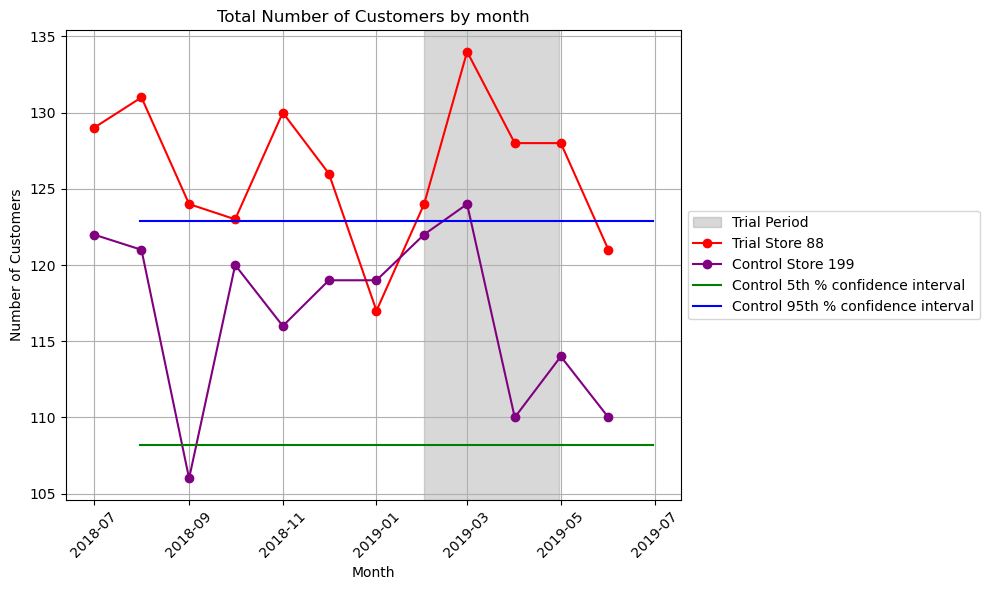

In [111]:
#Plot number of customers of the control store, the number of customers of the trial stores and the 95th and 5th percentile value of the control store.

percentile_df_6 = customers_control_6.copy()
percentile_df_6['5th_PERCENTILE_SALES'] = percentile_5_num_cust_6
percentile_df_6['95th_PERCENTILE_SALES'] = percentile_95_num_cust_6

# Plotting the sales data
plt.figure(figsize=(10, 6))

# Highlight the trial period 
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'), color='grey', alpha=0.3, label='Trial Period')

# Plot sales for each store
plt.plot(pivot_data.index, pivot_data[88], marker='o', color = 'red', label='Trial Store 88')
plt.plot(pivot_data.index, pivot_data[199], marker='o', color = 'purple', label='Control Store 199')

plt.plot(customers_control_6['YEAR_MONTH'], [percentile_5_num_cust_6]*len(customers_control_6), linestyle='-', color='green', label='Control 5th % confidence interval')
plt.plot(customers_control_6['YEAR_MONTH'], [percentile_95_num_cust_6]*len(customers_control_6), linestyle='-', color='blue', label='Control 95th % confidence interval')

# Adding titles and labels
plt.title('Total Number of Customers by month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)

# Place the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The plot suggests that Trial Store 88 outperforms Control Store 199 in attracting customers, particularly during the trial period. The trial likely had a positive impact on customer visits to Trial Store 88, leading to consistently higher customer numbers compared to Control Store 199.

Across all trial stores was a noticeable increase in both total sales and customer numbers during the trial period. But we see that the control stores (e.g., Control Store 199, 162) generally exhibited more volatility and lower performance compared to the trial stores during the trial period. Maybe it makes sence to extend the observation and discuss this results with client.